In [58]:
import pandas as pd   
import numpy as np   
import random 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from datetime import datetime
from datetime import timedelta



# Incidence dataset

In [59]:
# Import and pre-process data

df_regionInc = pd.read_csv("covid19dh.csv", dtype = {"Province/State":str, "Country/Region":str})
# cols 7 and 8 were giving me errors, so dtype str is used on them.
#df_regionInc
df_italyInc = df_regionInc[df_regionInc.ISO3=="ITA"]
df_italyInc = df_italyInc.dropna() # drop all the NaN's in case if they are there. 
Infected = df_italyInc['Confirmed'] -  df_italyInc['Recovered'] -  df_italyInc['Deaths']
df_italyInc.insert(3,"Infected",Infected)  
df_italyInc['Infected'] = df_italyInc['Infected'].rolling(7).mean() # ROLLING AVERAGE 
# Consider only these 3 cols
df_italyInc = df_italyInc.filter(["ObservationDate","Infected", "Province/State"], axis=1)
#df_italyInc



In [60]:
list(df_italyInc["Province/State"].unique())

['Friuli Venezia Giulia',
 'P.A. Bolzano',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'P.A. Trento',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [61]:
# Delete all rows that has Trento and Bolzano
df_italyInc.drop( df_italyInc[ df_italyInc['Province/State'] =='P.A. Trento' ].index , inplace=True)
df_italyInc.drop( df_italyInc[ df_italyInc['Province/State'] =='P.A. Bolzano' ].index , inplace=True)


In [62]:
list(df_italyInc["Province/State"].unique())

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [63]:
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,NaN,Friuli Venezia Giulia
85693,2020-01-02,NaN,Friuli Venezia Giulia
85694,2020-01-03,NaN,Friuli Venezia Giulia
85695,2020-01-04,NaN,Friuli Venezia Giulia
85696,2020-01-05,NaN,Friuli Venezia Giulia
...,...,...,...
389083,2021-01-16,17417.571429,Sardegna
389084,2021-01-17,17492.000000,Sardegna
389085,2021-01-18,17543.285714,Sardegna
389086,2021-01-19,17544.571429,Sardegna


# Mobility dataset

In [64]:
replace_dict = {"Friuli-Venezia Giulia":"Friuli Venezia Giulia",'Lombardy':'Lombardia',
                'Piedmont':'Piemonte','Aosta':"Valle d'Aosta",'Sicily': 'Sicilia','Apulia':'Puglia',
                'Tuscany':'Toscana','Sardinia':'Sardegna'}

In [65]:
file = '2020_IT_Region_Mobility_Report.csv'
data = pd.read_csv(file,sep=',')
df_italyMob = pd.DataFrame(data)

#Remove Trentino south tyrol
df_italyMob.drop( df_italyMob[ df_italyMob['sub_region_1'] =='Trentino-South Tyrol' ].index , inplace=True)

#data_df = data_df.head(n=329) # we want only national data
# get the names from of the regions from the mobility dataset
#region_namesMob = list(df_italyMob["sub_region_1"].dropna().unique())
#region_namesMob

In [66]:
df_italyMob['retail_and_recreation_percent_change_from_baseline'] = df_italyMob['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['parks_percent_change_from_baseline'] = df_italyMob['parks_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['transit_stations_percent_change_from_baseline'] = df_italyMob['transit_stations_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['workplaces_percent_change_from_baseline'] = df_italyMob['workplaces_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['residential_percent_change_from_baseline'] = df_italyMob['residential_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['grocery_and_pharmacy_percent_change_from_baseline'] = df_italyMob['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

In [67]:
# Replace to correct names of regions as seen in above incidence data.
for i in range(len(replace_dict.keys())):
    df_italyMob["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [68]:
region_namesMob = list(df_italyMob["sub_region_1"].dropna().unique())
region_namesMob

['Abruzzo',
 "Valle d'Aosta",
 'Puglia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardia',
 'Marche',
 'Molise',
 'Piemonte',
 'Sardegna',
 'Sicilia',
 'Toscana',
 'Umbria',
 'Veneto']

In [69]:
# cleaning filtering the mobility dataset
remove_province_data = (np.array(df_italyMob['sub_region_2'].isnull()))
df_italyMob = df_italyMob[remove_province_data]
df_italyMob=df_italyMob.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
df_italyMob = df_italyMob.dropna()


In [70]:
colr_regions = pd.read_csv("Region_colors.csv")
#colr_regions
colr_regions.insert(1, "reg_code", [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) 
colr_regions

,region,reg_code,2020-11-03_2020-12-04,2020-12-05_2020-12-25
0,Piemonte,1,red,yellow
1,Valle d'Aosta,2,red,orange
2,Lombardia,3,red,yellow
3,Veneto,5,yellow,yellow
4,Friuli Venezia Giulia,6,orange,yellow
5,Liguria,7,orange,yellow
6,Emilia-Romagna,8,orange,yellow
7,Toscana,9,red,orange
8,Umbria,10,orange,yellow
9,Marche,11,orange,orange


In [71]:
# 1st interval
interval1 = colr_regions.drop(columns=['2020-12-05_2020-12-25'])
interval1.sort_values(by=['2020-11-03_2020-12-04'],inplace=True) # sort the df by column
interval1.reset_index(drop=True, inplace=True) # reset the index values

interval1

,region,reg_code,2020-11-03_2020-12-04
0,Marche,11,orange
1,Basilicata,17,orange
2,Puglia,16,orange
3,Friuli Venezia Giulia,6,orange
4,Liguria,7,orange
5,Emilia-Romagna,8,orange
6,Campania,15,orange
7,Umbria,10,orange
8,Sicilia,19,orange
9,Calabria,18,red


In [72]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


In [73]:
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,NaN,Friuli Venezia Giulia
85693,2020-01-02,NaN,Friuli Venezia Giulia
85694,2020-01-03,NaN,Friuli Venezia Giulia
85695,2020-01-04,NaN,Friuli Venezia Giulia
85696,2020-01-05,NaN,Friuli Venezia Giulia
...,...,...,...
389083,2021-01-16,17417.571429,Sardegna
389084,2021-01-17,17492.000000,Sardegna
389085,2021-01-18,17543.285714,Sardegna
389086,2021-01-19,17544.571429,Sardegna


In [74]:
retail_tau=[]
parks_tau=[]
transit_tau=[]
workplace_tau=[]
residential_tau=[]
grocery_tau=[]
for i in list(np.array(interval1['region'])):
    reg_mob = df_italyMob[df_italyMob['sub_region_1']==i] 
    reg_inc = df_italyInc[df_italyInc['Province/State']==i] 
    
    reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-11-03','2021-01-20')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-11-03','2021-01-20')] 

    idx1 = pd.Index(reg_inc['ObservationDate'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_inc = reg_inc.reset_index()
    reg_mob = reg_mob.reset_index()

    #inc_startdate = '2020-05-18'
    #inc_enddate = '2020-11-03'
    mob_startdate = '2020-11-03'
    mob_enddate = '2020-12-04'
    
    reg_mob = reg_mob[reg_mob['date'].between(mob_startdate,mob_enddate)]
    reg_mob = reg_mob.reset_index()

    ndays_selected = len(reg_mob)

    dt_format_mobstart = datetime.strptime(mob_startdate, '%Y-%m-%d')
    dt_format_incstart = dt_format_mobstart + timedelta(days=16)
    inc_startdate = dt_format_incstart.strftime("%Y-%m-%d") # get it in string

    inc_startIndex = reg_inc.ObservationDate[reg_inc.ObservationDate == inc_startdate].index[0]
    inc_endIndex = inc_startIndex + ndays_selected

    reg_inc = reg_inc.iloc[inc_startIndex:inc_endIndex, :]
    reg_inc.reset_index()

    #reg_mob = reg_mob[reg_mob['date'].between('2020-05-18','2020-11-03')]

    #len(reg_inc)==len(reg_mob)
    #print(len(reg_inc))
    #print(len(reg_mob))

    
    print(len(reg_mob)==len(reg_inc))
    y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
    y2 = reg_mob['parks_percent_change_from_baseline']
    y3 = reg_mob['transit_stations_percent_change_from_baseline']
    y4 = reg_mob['workplaces_percent_change_from_baseline']
    y5 = reg_mob['residential_percent_change_from_baseline']
    y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
    x = reg_inc['Infected']   
       
    tau, p_value = stats.kendalltau(x, y1)
    retail_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y2)
    parks_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y3)
    transit_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y4)
    workplace_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y5)
    residential_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y6)
    grocery_tau.append(tau)


interval1['retail_and_recreation_percent_change_from_baseline']=retail_tau
interval1['parks_percent_change_from_baseline']=parks_tau
interval1['transit_stations_percent_change_from_baseline']=transit_tau
interval1['workplaces_percent_change_from_baseline']=workplace_tau
interval1['residential_percent_change_from_baseline']=residential_tau
interval1['grocery_and_pharmacy_percent_change_from_baseline'] =grocery_tau
       
interval1    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


,region,reg_code,2020-11-03_2020-12-04,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,Marche,11,orange,-0.203677,-0.006067,-0.087312,-0.250780,0.162076,-0.226314
1,Basilicata,17,orange,-0.914987,-0.750256,-0.854258,-0.784205,0.878750,-0.924170
2,Puglia,16,orange,-0.295028,-0.767678,-0.748263,-0.581076,0.676388,-0.495951
3,Friuli Venezia Giulia,6,orange,-0.730667,-0.340084,-0.584189,-0.688518,0.620229,-0.674819
4,Liguria,7,orange,0.211907,0.743436,0.232191,0.133604,-0.282845,0.255385
5,Emilia-Romagna,8,orange,-0.206900,0.054601,-0.057147,-0.250265,0.139654,-0.134704
6,Campania,15,orange,-0.105264,-0.008081,-0.074672,-0.112838,0.108508,-0.125000
7,Umbria,10,orange,0.254032,0.519719,0.424376,0.002035,-0.362980,0.342177
8,Sicilia,19,orange,-0.611030,-0.256307,-0.493931,-0.579882,0.505220,-0.431616
9,Calabria,18,red,-0.693725,-0.470232,-0.580132,-0.593726,0.560994,-0.593726


In [75]:
interval1.to_csv("3rdphase_1stinterval.csv",index=False)

In [76]:
# 1st interval
interval2 = colr_regions.drop(columns=['2020-11-03_2020-12-04'])
interval2.sort_values(by=['2020-12-05_2020-12-25'],inplace=True) # sort the df by column
interval2.reset_index(drop=True, inplace=True) # reset the index values
interval2


,region,reg_code,2020-12-05_2020-12-25
0,Marche,11,orange
1,Valle d'Aosta,2,orange
2,Campania,15,orange
3,Toscana,9,orange
4,Abruzzo,13,orange
5,Calabria,18,yellow
6,Basilicata,17,yellow
7,Puglia,16,yellow
8,Molise,14,yellow
9,Lazio,12,yellow


In [77]:
retail_tau=[]
parks_tau=[]
transit_tau=[]
workplace_tau=[]
residential_tau=[]
grocery_tau=[]
for i in list(np.array(interval2['region'])):
    reg_mob = df_italyMob[df_italyMob['sub_region_1']==i] 
    reg_inc = df_italyInc[df_italyInc['Province/State']==i] 
    
    reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-11-03','2021-01-20')]
    reg_mob = reg_mob[reg_mob['date'].between('2020-11-03','2021-01-20')] 

    idx1 = pd.Index(reg_inc['ObservationDate'])
    idx2 = pd.Index(reg_mob['date'])
           # len(reg_inc)==len(reg_mob)
    missing_dates = idx1.difference(idx2) 
    #print(missing_dates)
    for w in range(len(missing_dates)):
        reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
           # len(reg_inc)==len(reg_mob)
    missing_dates2 = idx2.difference(idx1) 
    #print(missing_dates2)
    for q in range(len(missing_dates2)):
        reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
    #print(len(reg_inc))
    #print(len(reg_mob))

    # reset index
    reg_inc = reg_inc.reset_index()
    reg_mob = reg_mob.reset_index()

    #inc_startdate = '2020-05-18'
    #inc_enddate = '2020-11-03'
    mob_startdate = '2020-12-05'
    mob_enddate = '2020-12-25'
    
    reg_mob = reg_mob[reg_mob['date'].between(mob_startdate,mob_enddate)]
    reg_mob = reg_mob.reset_index()

    ndays_selected = len(reg_mob)

    dt_format_mobstart = datetime.strptime(mob_startdate, '%Y-%m-%d')
    dt_format_incstart = dt_format_mobstart + timedelta(days=16)
    inc_startdate = dt_format_incstart.strftime("%Y-%m-%d") # get it in string

    inc_startIndex = reg_inc.ObservationDate[reg_inc.ObservationDate == inc_startdate].index[0]
    inc_endIndex = inc_startIndex + ndays_selected

    reg_inc = reg_inc.iloc[inc_startIndex:inc_endIndex, :]
    reg_inc.reset_index()

    #reg_mob = reg_mob[reg_mob['date'].between('2020-05-18','2020-11-03')]

    #len(reg_inc)==len(reg_mob)
    #print(len(reg_inc))
    #print(len(reg_mob))

    
    print(len(reg_mob)==len(reg_inc))
    y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
    y2 = reg_mob['parks_percent_change_from_baseline']
    y3 = reg_mob['transit_stations_percent_change_from_baseline']
    y4 = reg_mob['workplaces_percent_change_from_baseline']
    y5 = reg_mob['residential_percent_change_from_baseline']
    y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
    x = reg_inc['Infected']   
       
    tau, p_value = stats.kendalltau(x, y1)
    retail_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y2)
    parks_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y3)
    transit_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y4)
    workplace_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y5)
    residential_tau.append(tau)
    
    tau, p_value = stats.kendalltau(x, y6)
    grocery_tau.append(tau)


interval2['retail_and_recreation_percent_change_from_baseline']=retail_tau
interval2['parks_percent_change_from_baseline']=parks_tau
interval2['transit_stations_percent_change_from_baseline']=transit_tau
interval2['workplaces_percent_change_from_baseline']=workplace_tau
interval2['residential_percent_change_from_baseline']=residential_tau
interval2['grocery_and_pharmacy_percent_change_from_baseline'] =grocery_tau
       
interval2    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


,region,reg_code,2020-12-05_2020-12-25,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,Marche,11,orange,0.495238,0.287085,0.523810,0.460115,-0.526322,0.634847
1,Valle d'Aosta,2,orange,-0.835325,-0.863964,-0.657091,-0.599536,0.698573,-0.762610
2,Campania,15,orange,-0.902151,-0.790476,-0.863964,-0.558474,0.772202,-0.838095
3,Toscana,9,orange,-0.914286,-0.866667,-0.791387,-0.509639,0.711219,-0.866667
4,Abruzzo,13,orange,-0.835325,-0.866667,-0.794267,-0.529834,0.708142,-0.778045
5,Calabria,18,yellow,0.692126,0.615754,0.679434,0.548102,-0.644261,0.692126
6,Basilicata,17,yellow,0.580952,0.552381,0.631586,0.491648,-0.605797,0.631586
7,Puglia,16,yellow,0.596660,0.638095,0.514286,0.143542,-0.484425,0.520288
8,Molise,14,yellow,-0.653940,-0.902151,-0.730312,-0.354071,0.579771,-0.673108
9,Lazio,12,yellow,0.019139,-0.047619,-0.023866,-0.057417,-0.033574,0.104762


In [78]:
interval2.to_csv("3rdphase_2ndinterval.csv",index=False)

# Box plot residential

In [79]:
int1_red=np.array(interval1["residential_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='red'])
int1_yellow=np.array(interval1["residential_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='yellow'])
int1_orange=np.array(interval1["residential_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='orange'])

#int2_red=np.array(interval1["residential_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='red'])
int2_yellow=np.array(interval1["residential_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='yellow'])
int2_orange=np.array(interval1["residential_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='orange'])



In [80]:
["Yellow region"]*len(int1_yellow)

['Yellow region', 'Yellow region', 'Yellow region', 'Yellow region']

In [81]:
yellow1_names = list(interval1["region"][interval1["2020-11-03_2020-12-04"]=='yellow'])
red2_names=list(interval2["region"][interval2['2020-12-05_2020-12-25']=='red'])
print(yellow1_names)
print(red2_names)

['Molise', 'Veneto', 'Lazio', 'Sardegna']
[]


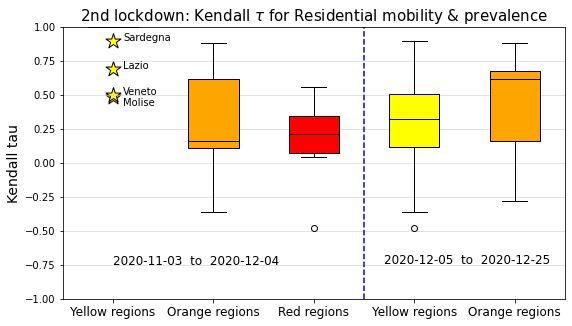

In [82]:
int1_red=np.array(interval1["residential_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='red'])
int1_yellow=np.array(interval1["residential_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='yellow'])
int1_orange=np.array(interval1["residential_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='orange'])

#int2_red=np.array(interval1["residential_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='red'])
int2_yellow=np.array(interval1["residential_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='yellow'])
int2_orange=np.array(interval1["residential_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='orange'])




plt.figure(figsize=(9,5))
data = [[1],int1_orange,int1_red,int2_yellow,int2_orange]

box = plt.boxplot(data, patch_artist=True)
 
colors = ['yellow','orange','red','yellow','orange']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for patch in box['medians']:
    patch.set_color('black')
    #patch.set_median(color='black')
    
    
    

plt.ylim([-1,1])
#plt.xticks(ticks=range(1,7),labels=["Yellow regions","Orange regions","Red regions","Yellow regions","Orange regions"])
plt.xticks([1,2,3,4,5],["Yellow regions","Orange regions","Red regions","Yellow regions","Orange regions"],size=12)
plt.scatter([1]*len(int1_yellow),int1_yellow,marker='*',s=250,color='yellow',edgecolors='black')
plt.text(1.1,int1_yellow[0]-0.07,s=yellow1_names[0])
plt.text(1.1,int1_yellow[1],s=yellow1_names[1])
plt.text(1.1,int1_yellow[2],s=yellow1_names[2])
plt.text(1.1,int1_yellow[3],s=yellow1_names[3])

#plt.scatter([6]*len(int2_red),int2_red,marker='*',s=250,color='red',edgecolors='black')
#plt.text(5.5,int2_red[0],s=red2_names[0])
#plt.text(5.5,int2_red[1],s=red2_names[1])

plt.axvline(x=3.5,color='blue',linestyle='--')
plt.text(1,-0.75,"2020-11-03  to  2020-12-04",size=12)
plt.text(3.7,-0.74,"2020-12-05  to  2020-12-25",size=12)
plt.ylabel('Kendall tau',size=14)
plt.title("2nd lockdown: Kendall $\\tau$ for Residential mobility & prevalence",size=15)
plt.grid(axis='y', linestyle='-', which='major', color='lightgrey', alpha=0.8)
plt.savefig("phase3_residentialRA.png")
plt.show()

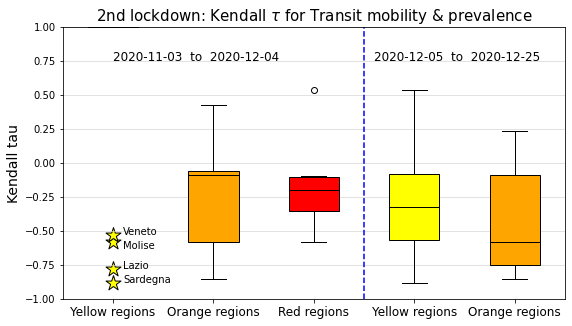

In [83]:
int1_red=np.array(interval1["transit_stations_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='red'])
int1_yellow=np.array(interval1["transit_stations_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='yellow'])
int1_orange=np.array(interval1["transit_stations_percent_change_from_baseline"][interval1["2020-11-03_2020-12-04"]=='orange'])

#int2_red=np.array(interval1["transit_stations_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='red'])
int2_yellow=np.array(interval1["transit_stations_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='yellow'])
int2_orange=np.array(interval1["transit_stations_percent_change_from_baseline"][interval2['2020-12-05_2020-12-25']=='orange'])




plt.figure(figsize=(9,5))
data = [[1],int1_orange,int1_red,int2_yellow,int2_orange]

box = plt.boxplot(data, patch_artist=True)
 
colors = ['yellow','orange','red','yellow','orange']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for patch in box['medians']:
    patch.set_color('black')
    #patch.set_median(color='black')
    
    
    

plt.ylim([-1,1])
#plt.xticks(ticks=range(1,7),labels=["Yellow regions","Orange regions","Red regions","Yellow regions","Orange regions"])
plt.xticks([1,2,3,4,5],["Yellow regions","Orange regions","Red regions","Yellow regions","Orange regions"],size=12)
plt.scatter([1]*len(int1_yellow),int1_yellow,marker='*',s=250,color='yellow',edgecolors='black')
plt.text(1.1,int1_yellow[0]-0.05,s=yellow1_names[0])
plt.text(1.1,int1_yellow[1],s=yellow1_names[1])
plt.text(1.1,int1_yellow[2],s=yellow1_names[2])
plt.text(1.1,int1_yellow[3],s=yellow1_names[3])

#plt.scatter([6]*len(int2_red),int2_red,marker='*',s=250,color='red',edgecolors='black')
#plt.text(5.5,int2_red[0],s=red2_names[0])
#plt.text(5.5,int2_red[1],s=red2_names[1])

plt.axvline(x=3.5,color='blue',linestyle='--')
plt.text(1,0.75,"2020-11-03  to  2020-12-04",size=12)
plt.text(3.6,0.75,"2020-12-05  to  2020-12-25",size=12)
plt.ylabel('Kendall tau',size=14)
plt.title("2nd lockdown: Kendall $\\tau$ for Transit mobility & prevalence",size=15)
plt.grid(axis='y', linestyle='-', which='major', color='lightgrey', alpha=0.8)
plt.savefig("phase3_transitRA.png")
plt.show()